<a href="https://colab.research.google.com/github/DamithaNuwanPremlalDNP/AI-ML_python/blob/main/Task_2_%E2%80%93_Sentiment_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📦 Step 1 – Load the Dataset


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Tweets.csv')  # Adjust path/filename as needed

# Keep only relevant columns
df = df[["airline_sentiment", "text"]]

df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


🧼 Step 2 – Preprocess Text


In [4]:
import nltk
import string
import re
from nltk.stem.porter import PorterStemmer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data

from nltk.corpus import stopwords

ps = PorterStemmer()

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)  # Remove URLs
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    return " ".join(y)

# Apply text cleaning
df["text_cleaned"] = df["text"].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,airline_sentiment,text,text_cleaned
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plu 've ad commerci experi ... t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica n't today ... must mean need tak...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica 's realli aggress blast obnoxi `...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica 's realli big bad thing


✨ Step 3 – Feature Extraction (TF-IDF)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform text data
X = tfidf.fit_transform(df['text_cleaned']).toarray()

# Target variable
Y = df['airline_sentiment'].values


🧠 Step 4 – Train and Evaluate Models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# --- Naive Bayes ---
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))

# --- Random Forest ---
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Naive Bayes Accuracy: 0.7213114754098361
Random Forest Accuracy: 0.7523907103825137


📊 Optional: Confusion Matrix and Classification Report

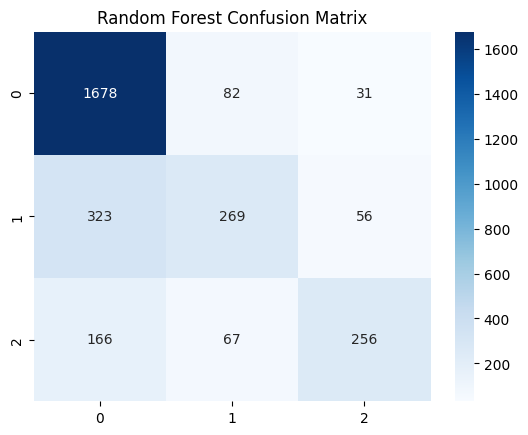

Random Forest Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.94      0.85      1791
     neutral       0.64      0.42      0.50       648
    positive       0.75      0.52      0.62       489

    accuracy                           0.75      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.74      0.75      0.73      2928



In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
